## CAR PRICE PREDICTION

Goal :->
Predict Car Price based on features like Year,Selling price,present price,fuel type,kms_driven and seller type etc.

Model: Multiple Linear Regression
We'll include:

1. Data Collection
1. Data preprocessing (Encoding, train-test split)
2. Training the model using different regression model like Linear and Lasso Regression and visualize it.
3. Evaluation (R² score for two model)
4. Prediction

In [1]:
#import the dependencies
import numpy as np
import matplotlib.pyplot as plt     
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Preprocessing

In [3]:
df = pd.read_csv('Datasets/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Number of rows and columns
df.shape

(301, 9)

In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Count the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# check the distribution of categorical data
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64  
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [16]:
# Encoding the categorical data
df.replace({'Fuel_Type':{'CNG':0,'Diesel':1,'Petrol':2}}, inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)   
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17820\432679811.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'CNG':0,'Diesel':1,'Petrol':2}}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17820\432679811.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17820\432679811.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,2,0,0,0
3,wagon r,2011,2.85,4.15,5200,2,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Model Training

In [19]:
# splitting the data into features and target variable
X = df.drop(columns=['Car_Name','Selling_Price'], axis=1)
Y = df['Selling_Price']

In [20]:
# splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

#### 1. Linear Regression

In [21]:
#Training the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [22]:
# Evaluation of linear regression
train_data_pred = lin_reg_model.predict(X_train)
test_data_pred = lin_reg_model.predict(X_test)

print('R squared error: ', metrics.r2_score(Y_train, train_data_pred))
print('R squared error: ', metrics.r2_score(Y_test, test_data_pred))

R squared error:  0.8806173715719117
R squared error:  0.8311069476243549


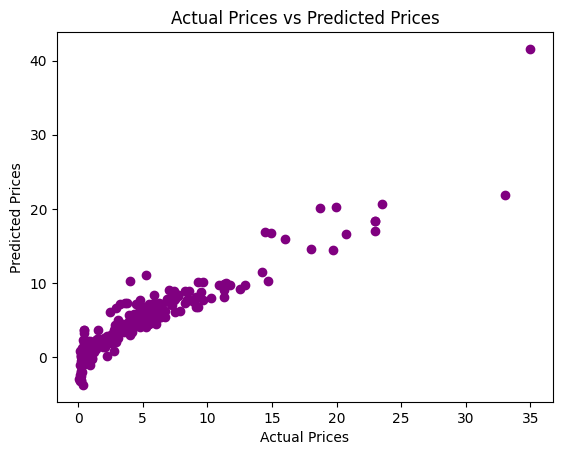

In [24]:
# Visualizing the actual prices and predicted prices for training data
plt.scatter(Y_train,train_data_pred,color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

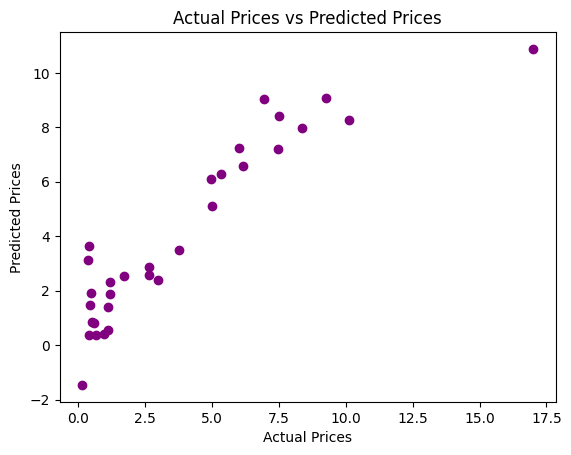

In [25]:
# Visualizing the actual prices and predicted prices for test data
plt.scatter(Y_test,test_data_pred,color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#### 2. Lasoo Regression

In [26]:
#Training the Lasso Regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [27]:
# Evaluation of linear regression
train_data_pred = lasso_reg_model.predict(X_train)
test_data_pred = lasso_reg_model.predict(X_test)

print('R squared error: ', metrics.r2_score(Y_train, train_data_pred))
print('R squared error: ', metrics.r2_score(Y_test, test_data_pred))

R squared error:  0.8436909482009382
R squared error:  0.8392263200498731


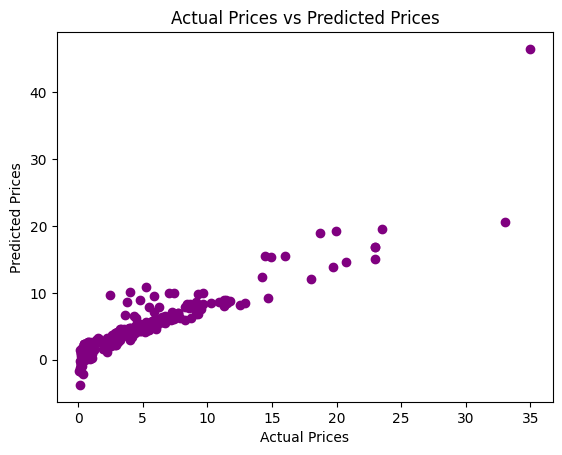

In [28]:
# Visualizing the actual prices and predicted prices for training data
plt.scatter(Y_train,train_data_pred,color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

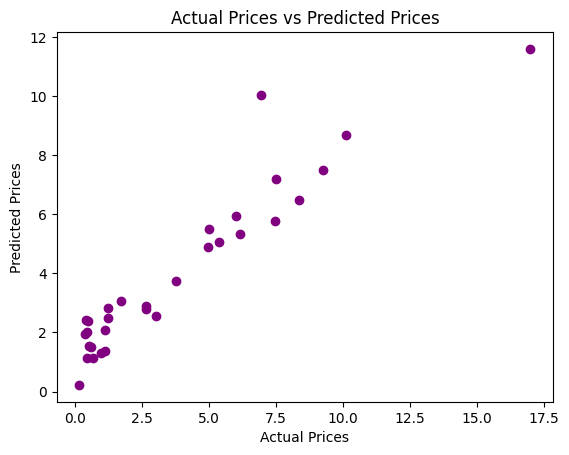

In [29]:
# Visualizing the actual prices and predicted prices for test data
plt.scatter(Y_test,test_data_pred,color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Predictive System

In [33]:
new_data = X_test.iloc[3]
new_data = new_data.values.reshape(1, -1)  # Reshape to 2D array
predicted_price = lasso_reg_model.predict(new_data)
print(f"The predicted price for the car is: {predicted_price[0]:.2f}")
print(f"Actual price of the car is: {Y_test.iloc[3]:.2f}")

The predicted price for the car is: 0.22
Actual price of the car is: 0.15


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
